# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [91]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
data_complete = pd.merge(mouse_metadata, study_results, how="inner", on=["Mouse ID", "Mouse ID"])
# Display the data table for preview
data_complete.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [92]:
# Checking the number of mice
num_mice = data_complete["Mouse ID"].value_counts()
num_mice = len(num_mice)
num_mice

249

In [93]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = data_complete.loc[data_complete.duplicated(subset = ["Mouse ID","Timepoint"]),"Mouse ID"].unique()
duplicate_mice

array(['g989'], dtype=object)

In [94]:
# Optional: Get all the data for the duplicate mouse ID. 
chart_data = data_complete.set_index("Mouse ID")
chart_data.loc["g989"]

,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,,,
g989,Propriva,Female,21,26,0,45.000000,0
g989,Propriva,Female,21,26,0,45.000000,0
g989,Propriva,Female,21,26,5,48.786801,0
g989,Propriva,Female,21,26,5,47.570392,0
g989,Propriva,Female,21,26,10,51.745156,0
g989,Propriva,Female,21,26,10,49.880528,0
g989,Propriva,Female,21,26,15,51.325852,1
g989,Propriva,Female,21,26,15,53.442020,0
g989,Propriva,Female,21,26,20,55.326122,1


In [95]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_complete = data_complete[data_complete['Mouse ID'].isin(duplicate_mice) == False]
clean_complete.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [96]:
# Checking the number of mice in the clean DataFrame.
num_mice_clean = clean_complete["Mouse ID"].value_counts()
num_mice_clean = len(num_mice_clean)
num_mice_clean

248

## Summary Statistics

In [68]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
tumorvolume = clean_complete.groupby(["Drug Regimen"])
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
tumor_mean = tumorvolume["Tumor Volume (mm3)"].mean()
tumor_median = tumorvolume["Tumor Volume (mm3)"].median()
tumor_variance = tumorvolume["Tumor Volume (mm3)"].var()
tumor_standard_deviation = tumorvolume["Tumor Volume (mm3)"].std()
tumor_sem = tumorvolume["Tumor Volume (mm3)"].sem()


# Assemble the resulting series into a single summary DataFrame.
tumorvolume_df = pd.DataFrame ({"Mean Tumor Volume":tumor_mean,
                                "Median Tumor Volume":tumor_median,
                                " Tumor Volume Variance":tumor_variance,
                                "Tumor Volume Std. Dev.":tumor_standard_deviation,
                                "Tumor Volume Std. Err.":tumor_sem
})
tumorvolume_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [69]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line.
tumorvolume_agg = clean_complete.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].agg(["mean","median", "var", "std", "sem"])
tumorvolume_agg

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

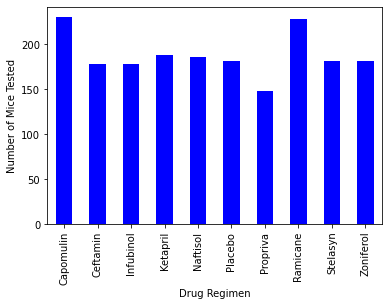

In [70]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
all_mice_tested = clean_complete.groupby(["Drug Regimen"])["Timepoint"].count()

#plot bar
all_mice_tested.plot(kind="bar",figsize=(6,4), color = "b")
plt.ylabel("Number of Mice Tested")

plt.show()

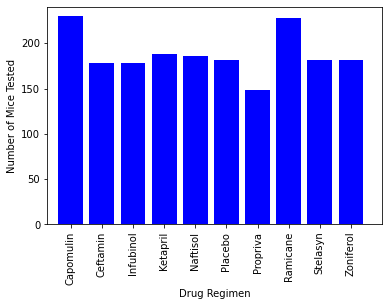

In [71]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

x_axis = np.arange(len(all_mice_tested))
tick_locations = [value for value in x_axis]

plt.figure(figsize=(6,4))
plt.bar(x_axis, all_mice_tested, color="b", align="center")
plt.xticks(tick_locations, all_mice_tested.index.values, rotation= "vertical")

# Set x and y limits
plt.xlim(-0.75, len(x_axis))
plt.ylim(0, max(all_mice_tested)+10)

#Set Labels
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tested")

plt.show()

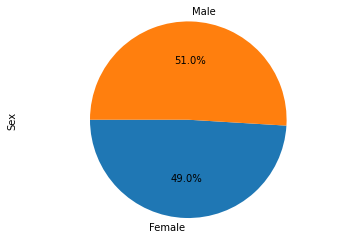

In [72]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
male_vs_female = clean_complete.groupby(['Sex'])['Sex'].count()
                                        
male_vs_female.plot(kind="pie", startangle=180, autopct="%1.1f%%", subplots =True )

plt.axis("equal")
plt.show()

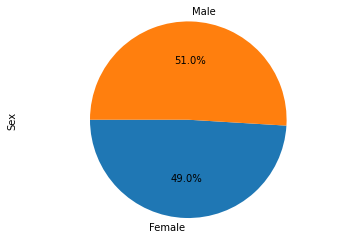

In [73]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
pie = ["Female","Male"]

plt.pie(male_vs_female,
        autopct="%1.1f%%", startangle=180, labels=pie)
plt.ylabel("Sex")

plt.axis("equal")
plt.show()

## Quartiles, Outliers and Boxplots

In [200]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin


#  Start by getting the last (greatest) timepoint for each mouse
greatest_tp = clean_complete.groupby("Mouse ID")["Timepoint"].max().reset_index()
greatest_tp = pd.DataFrame(greatest_tp)
greatest_tp

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
combined_df = pd.merge(clean_complete, greatest_tp, on="Mouse ID")
combined_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint_x,Tumor Volume (mm3),Metastatic Sites,Timepoint_y
0,k403,Ramicane,Male,21,16,0,45.000000,0,45
1,k403,Ramicane,Male,21,16,5,38.825898,0,45
2,k403,Ramicane,Male,21,16,10,35.014271,1,45
3,k403,Ramicane,Male,21,16,15,34.223992,1,45
4,k403,Ramicane,Male,21,16,20,32.997729,1,45


In [208]:
# Put treatments into a list for for loop (and later for plot labels)
combined_drug = ["Capomulin","Ramicane","Infubinol","Ceftamin"]
combined_drug

# Create empty list to fill with tumor vol data (for plotting)
tumorvol_capomulin = []
tumorvol_Ramicane = []
tumorvol_Infubinol = []
tumorvol_Ceftamin = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
quartiles = combined_df.quantile([.25,.5,.75])
lowerq = np.quantile(combined_df[0.25],
upperq = np.quantile(combined_df[0.75],
iqr = upperq-lowerq


print(f"The lower quartile is: {lowerq}")
print(f"The upper quartile is: {upperq}")
print(f"The interquartile range is: {iqr}")
print(f"The the median is: {quartiles[0.5]} ")
                     
                     
# Determine outliers using upper and lower bounds                     
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")                    
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
for row in combined_df:
    if row["Drug Regimen"] == "capomulin":
        tumorvol_capomulin.append(row["Tumor Volume (mm3)"])
    if row["Drug Regimen"] == "Ramicane":
        tumorvol_Ramicane.append(row["Tumor Volume (mm3)"])
    if row["Drug Regimen"] == "Infubinol":
        tumorvol_Infubinol.append(row["Tumor Volume (mm3)"])
    if row["Drug Regimen"] == "Ceftimane":
        tumorvol_Cefitmane.append(row["Tumor Volume (mm3)"])
    
    # add subset 

   
 


SyntaxError: invalid syntax (425156668.py, line 20)

In [180]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.



## Line and Scatter Plots

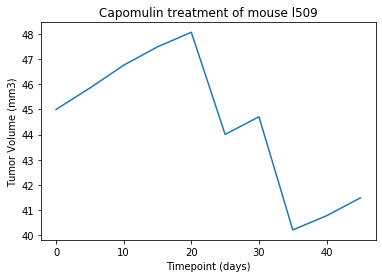

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin



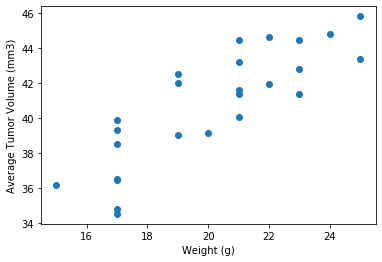

In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen



## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


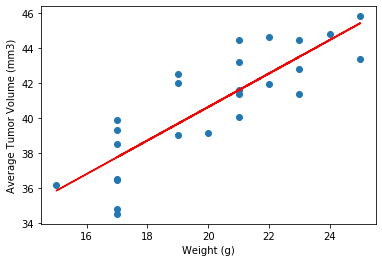

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

